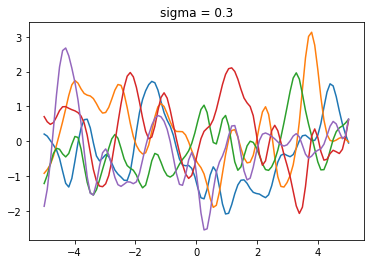

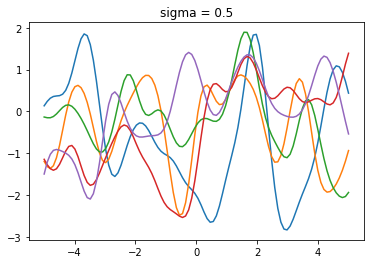

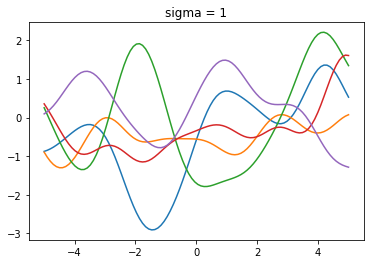

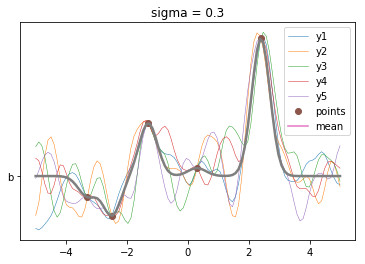

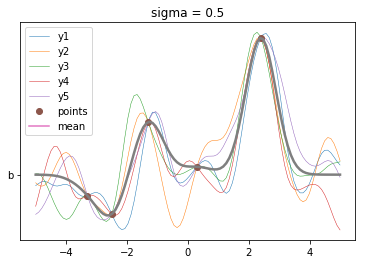

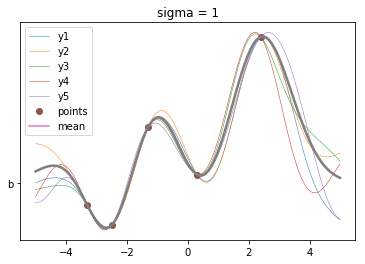

In [238]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,100)
size = np.size(x)
mean = np.zeros(size)
para = [0.3,0.5,1]

def generate_f(mean,para,x):
    size = np.size(x)
    cov_0 = np.zeros([size,size])
    cov_1 = np.zeros([size,size])
    cov_2 = np.zeros([size,size])
    for i in np.arange(size):
        for j in np.arange(size):
            cov_0[i][j] = np.exp(-(x[i]-x[j])**2/(2*np.square(para[0])))
            cov_1[i][j] = np.exp(-(x[i]-x[j])**2/(2*np.square(para[1])))
            cov_2[i][j] = np.exp(-(x[i]-x[j])**2/(2*np.square(para[2])))
    return cov_0,cov_1,cov_2

a = generate_f(mean,para,x)
for i in np.arange(5):
    y=np.random.multivariate_normal(mean, a[0]).T
    plt.plot(x, y)
plt.title('sigma = 0.3')
plt.show()

for i in np.arange(5):
    y=np.random.multivariate_normal(mean, a[1]).T
    plt.plot(x, y)
plt.title('sigma = 0.5')
plt.show()

for i in np.arange(5):
    y=np.random.multivariate_normal(mean, a[2]).T
    plt.plot(x, y)
plt.title('sigma = 1')
plt.show()



def conditional_for_gaussian(sigma,mu,given_indices,given_values):
    a = given_indices
    size = np.size(a)
    size_a  = np.shape(sigma)[1]-size
    sigma_bb = np.zeros((size,size))
    for i in np.arange(size):
        for j in np.arange(size):
            sigma_bb[i,j] = sigma[a[i],a[j]]
    sigma_aa= np.delete(sigma,a,0)
    sigma_aa = np.delete(sigma_aa,a,1)
    
    sigma_ab_t = np.delete(sigma,a,0)
    sigma_ab = np.zeros((size_a,size))  
    for i in np.arange(size):
        sigma_ab[:,i] = sigma_ab_t[:,a[i]]

    sigma_ba_t = np.delete(sigma,a,1)
    sigma_ba = np.zeros((size,size_a))
    for i in np.arange(size):
        sigma_ba[i,:] = sigma_ba_t[a[i],:]
    sigma_con = sigma_aa - sigma_ab@np.linalg.inv(sigma_bb)@sigma_ba
    mu_b = mu[given_indices]
    mu_a = np.delete(mu,given_indices,0)
    mu_con = mu_a + sigma_ab@np.linalg.inv(sigma_bb)@(np.reshape(given_values,(5,1))-mu_b)
   
    return (mu_con,sigma_con)
D = np.array([
    [-1.3,2],
    [2.4,5.2],
    [-2.5,-1.5],
    [-3.3,-0.8],
    [0.3,0.3]
])

allconv = np.vstack((D[:,0].reshape(5,1),x.reshape(100,1),))
mean = np.zeros((105,1))
b = generate_f(mean,para,allconv)
index = [0,1,2,3,4]

q1 = conditional_for_gaussian(b[0],mean,index,D[:,1])
q2 = conditional_for_gaussian(b[1],mean,index,D[:,1])
q3 = conditional_for_gaussian(b[2],mean,index,D[:,1])


for i in np.arange(5):
    y=np.random.multivariate_normal(np.reshape(q1[0],100), q1[1])
    plt.plot(x,y,linewidth = 0.5)
plt.title('sigma = 0.3')
D = np.sort(D)
plt.plot(D[:,0],D[:,1],'o','b')
plt.plot(x,q1[0],linewidth=2.5)
plt.legend(['y1','y2','y3','y4','y5','points','mean'])
plt.show()
plt.savefig('Posterior sigma = 0.3.png')

for i in np.arange(5):
    y=np.random.multivariate_normal(np.reshape(q2[0],100), q2[1])
    plt.plot(x,y,linewidth = 0.5)
plt.title('sigma = 0.5')
plt.plot(D[:,0],D[:,1],'o','b')
plt.plot(x,q2[0],linewidth=2.5)
plt.legend(['y1','y2','y3','y4','y5','points','mean'])
plt.show()
plt.savefig('Posterior sigma = 0.5.png')

for i in np.arange(5):
    y=np.random.multivariate_normal(np.reshape(q3[0],100), q3[1])
    plt.plot(x,y,linewidth=0.5)
plt.title('sigma = 1')
plt.plot(D[:,0],D[:,1],'o','b')
plt.plot(x,q3[0],linewidth=2.5)
plt.legend(['y1','y2','y3','y4','y5','points','mean'])
plt.show()
plt.savefig('Posterior sigma = 1.png')